In [1]:
#conda install -c conda-forge textblob vadersentiment -y

In [2]:
import sqlite3
import pandas as pd

con = sqlite3.connect('data/wb_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
#df

OperationalError: unable to open database file

In [3]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [4]:
sentiment_dict = sentiment_df.to_dict()['score']

In [5]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

NameError: name 'df' is not defined

In [6]:
df['keyword_sentiment'] = title_sentiments

['Dear VisualMod,',
 'Yoda gives good advice.',
 'TLRY: The Perfect Buy',
 'You best start believing...',
 'And no luck',
 'Two great signs for sdc',
 'High on Cannabis Opportunity',
 'That kind of day',
 'Greatest hits from Earlier this year',
 'Robinhood Fair Fund 24,000',
 "Rising chip prices fuel Samsung's best quarterly profit in 3 years",
 '$PLTR Will be a good day 😎🤙🏽',
 "Farewell my tendies, it's been a pleasure",
 'A true BABA bull never backs down',
 '$SDC held support PERFECT today! [Tech Analysis] 🔥 , see chart below.',
 'JPow showing his true self',
 'Jan nostalgia... best GME edit of all time.',
 'Poker is a game where you win once, but a lot.',
 'Nearing -100k on a profitable stock…fml',
 'Taiwan Semiconductor setting for a great close TP 150$']

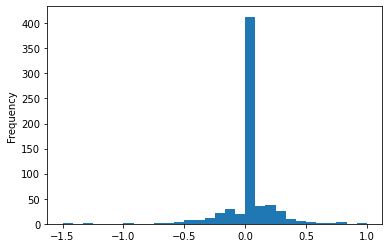

In [7]:
df['keyword_sentiment'].plot.hist(bins=30)# full titles of the top 10 sentiments
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:20]

In [8]:
df['keyword_sentiment'].mean()

0.005944455067040268

In [9]:
# full titles of the bottom 10 sentiments
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['Loss Porn!',
 'FUCK YO PUTS',
 '$AAWW SHIT $250K YOLO',
 'Small dick club $SDC',
 'Down 15K from my highs. Macau is fucking my ass with no lube.',
 'Retarded $RIOT DD',
 'YOLO turns to loss porn...',
 'What the hell happened to $SPIR ?',
 'How fucked am I? Cost basis: $25200',
 'Goldman Flags $8.2 Trillion Threat Worse Than China Evergrande']

In [10]:
# full titles of the top 10 sentiments
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Dear VisualMod,',
 'Yoda gives good advice.',
 'TLRY: The Perfect Buy',
 'You best start believing...',
 'And no luck',
 'Two great signs for sdc',
 'High on Cannabis Opportunity',
 'That kind of day',
 'Greatest hits from Earlier this year',
 'Robinhood Fair Fund 24,000']

In [11]:
from textblob import TextBlob

tb = TextBlob("Small dick club $SDC")
tb.sentiment

Sentiment(polarity=-0.25, subjectivity=0.4)

<AxesSubplot:ylabel='Frequency'>

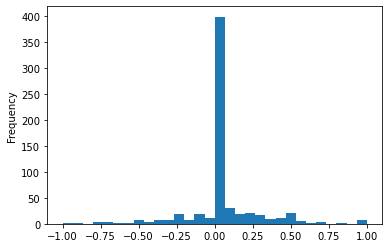

In [12]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)
df['tb_sentiment'].plot.hist(bins=30)

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("Small dick club $SDC")

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

In [15]:
analyzer.polarity_scores("Small dick club $SDC")['compound']

-0.5106

In [16]:
from textblob import TextBlob

tb = TextBlob("TLRY: The Perfect Buy")
tb.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("TLRY: The Perfect Buy")

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [18]:
analyzer.polarity_scores("TLRY: The Perfect Buy")['compound']

0.5719

In [19]:
from textblob import TextBlob

tb = TextBlob("$PLTR Will be a good day 😎🤙🏽")
tb.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("$PLTR Will be a good day 😎🤙🏽")

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8442}

In [21]:
analyzer.polarity_scores("$PLTR Will be a good day 😎🤙🏽")['compound']

0.8442

In [22]:
from textblob import TextBlob

tb = TextBlob("$WISH loss covered Calls not paying enough")
tb.sentiment

Sentiment(polarity=0.0, subjectivity=0.5)

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("$WISH loss covered Calls not paying enough")

{'neg': 0.214, 'neu': 0.466, 'pos': 0.32, 'compound': 0.2808}

In [24]:
analyzer.polarity_scores("$WISH loss covered Calls not paying enough]")['compound']

0.2808

In [25]:
from textblob import TextBlob

tb = TextBlob("Apple Stock: Rough September Can Be Great For October Returns")
tb.sentiment

Sentiment(polarity=0.35000000000000003, subjectivity=0.575)

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("Apple Stock: Rough September Can Be Great For October Returns")

{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249}

In [27]:
analyzer.polarity_scores("Apple Stock: Rough September Can Be Great For October Returns")['compound']

0.6249


The overall sentiment of the subreddit was slightly positive with the average being 0.0368. The language used in the Wallstreet bets subreddit is rather vulgar (just a heads up), so I was expecting pretty negative sentiment out of most topics. I examined some subreddit titles that included stocks that I saw were frequently mentioned from my last weeks analysis and a few others. $sdc had negative sentiment and a polarity score of -0.51. I believe the stock has been performing very poorly in the last few months so this is to be expected. The stock $tlry had no negative sentiment and had a polarity score of 0.57. I haven’t really heard of this stock so I’d be interested to follow it and see how its sentiment changes based on its performance. $pltr and $aaple had mostly neutral sentiment. $wish is another poorly performing stock that had a roughly equal negative to positive sentiment with a polarity score of 0.28. 

$sdc 
'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106
-0.5106

$tlry 
'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719
0.5719

$pltr
'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.8442
0.8442

$wish
'neg': 0.214, 'neu': 0.466, 'pos': 0.32, 'compound': 0.2808
0.2808

$aapl
'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249
0.6249

I would like to use this data in the future to analyze the sentiment with the stocks performance. There is a tool in stocks called the fear and greed index (Not sure how it’s calculated). I imagine something similar can be done using this subreddits data. There could be a sentiment index corresponding to how well a stock is performing to get more insight into what people are thinking.